In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#k-means
def kmeans_segmentation(img):
    img = img.astype(float)
    rows, cols = img.shape
    pixel_values = img.flatten()
    k = 2  # 聚类数量
    max_iters = 100
    
    # 初始化聚类中心
    centroids = np.array([np.min(pixel_values), np.max(pixel_values)])
    
    for iter in range(max_iters):
        # 计算每个像素到聚类中心的距离
        distances = np.abs(pixel_values[:, np.newaxis] - centroids)
        
        # 分配像素到最近的聚类中心
        cluster_idx = np.argmin(distances, axis=1)
        
        # 计算新的聚类中心
        new_centroids = np.array([np.mean(pixel_values[cluster_idx == x]) for x in range(k)])
        
        # 检查是否收敛
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids
    
    # 重塑结果图像
    segmented_img = cluster_idx.reshape(rows, cols)
    
    return segmented_img


In [3]:
# 读取图像
image_path = 'img_1.png'
img = Image.open(image_path).convert('L')
img = np.array(img)

In [4]:
# 应用k-means分割
segmented_img = kmeans_segmentation(img)

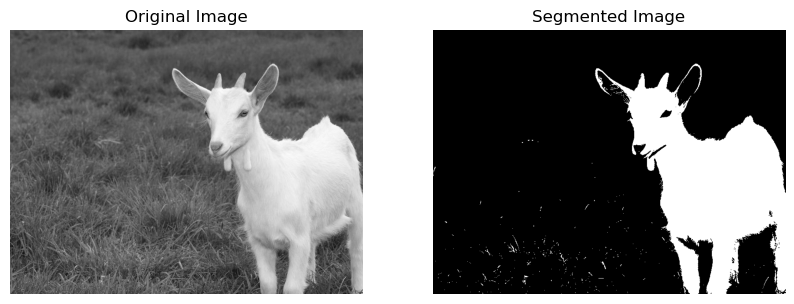

In [5]:
# 显示原始图像和分割结果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_img, cmap='gray')
plt.axis('off')

plt.show()

In [6]:
#FCM

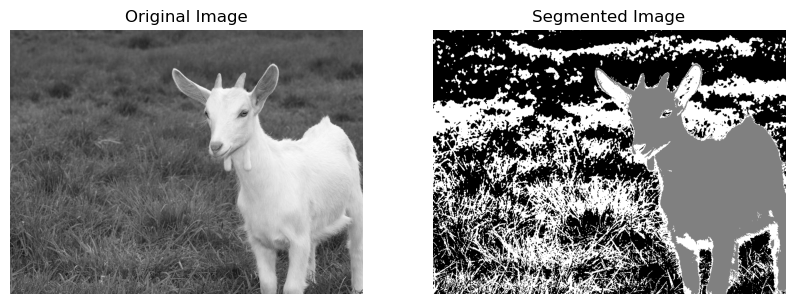

In [7]:
from scipy.spatial.distance import cdist

def FCM(X, c, m, eps, max_its):
    num_samples = X.shape[0]
    u = np.random.random((num_samples, c))
    u = np.divide(u, np.sum(u, axis=1)[:, np.newaxis])
    it = 0

    while it < max_its:
        it += 1
        um = u ** m
        centers = np.divide(np.dot(um.T, X), np.sum(um.T, axis=1)[:, np.newaxis])
        distance = cdist(X, centers, metric='euclidean') ** 2

        new_u = np.zeros_like(u)
        for i in range(num_samples):
            for j in range(c):
                new_u[i, j] = 1.0 / np.sum((distance[i, j] / distance[i]) ** (2 / (m - 1)))

        if np.linalg.norm(new_u - u) < eps:
            break

        u = new_u

    labels = np.argmax(u, axis=1)
    return labels, u, centers

def segment_image(image_path, c, m, eps, max_its):
    # 使用Pillow读取图像并转换为灰度图像
    img = Image.open(image_path).convert('L')
    img = np.array(img)
    rows, cols = img.shape

    # 将图像像素数据展平并标准化
    X = img.reshape(-1, 1)
    X = X / 255.0  # 标准化

    # 使用FCM算法对图像进行聚类
    labels, u, centers = FCM(X, c, m, eps, max_its)

    # 将聚类结果映射回图像格式
    segmented_img = labels.reshape(rows, cols)

    # 显示原始图像和分割后的图像
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Segmented Image')
    plt.imshow(segmented_img, cmap='gray')
    plt.axis('off')

    plt.show()

# 示例用法
image_path = 'img_1.png' 
c = 3  # 聚类数量
m = 2.0  # 模糊参数
eps = 1e-5  # 收敛阈值
max_its = 100  # 最大迭代次数

segment_image(image_path, c, m, eps, max_its)

